## Get Transcripts from YouTube Videos

In [1]:
#ensure you've install packages from requirements.txt
#!pip install -r requirements.txt

In [2]:
# # Replace 'video_id' with the ID of the YouTube video for your fav tech Keynote address 
# # (e.g. Ignite, re:Invent, Next..) to build a grapphical wordcloud image of the TOP N must spoken words
# # Find the video you want and strip off the portion of the url following the '/watch?v='
video_id = 'hd_FIQ3QSmU'

# # Download the youtube video transcript
from youtube_transcript_api import YouTubeTranscriptApi
import re

# # Get the transcript from the youtube
transcript_list = YouTubeTranscriptApi.get_transcript(video_id)

# # Join the :text: portion up
transcript_text = ' '.join([transcript['text'] for transcript in transcript_list])

# WordCloud (WC)
wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      min_font_size = 10)


# # Fix some transcript goofs for tech words jargon
transcript_text = re.sub(r'\bsequel\b', 'SQL', transcript_text, flags=re.IGNORECASE) # replace 'sequel' with 'SQL', doh.
# ## add more here, like IoT or YAML or other things that yt transcript fouls up

# # Fix this to save the file as the youtube-title.txt (you might have to remove spaces and invalid characters from the name to save the txt file)
with open(video_id+'output.txt', 'w') as file:
    file.write(transcript_text)

# from wordcloud import WordCloud
import matplotlib.pyplot as plt
from random import choice

# # Define Google's primary colors
google_colors = ['#DB4437', '#4285F4', '#F4B400', '#0F9D58']  # Blue, Green, Yellow, Red

def google_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return choice(google_colors)

# # Assuming 'word_freq' is your dictionary of word frequencies
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10,color_func=google_color_func)  # Use the custom color function

# # Generate and display the word cloud
# wordcloud.generate_from_frequencies(word_freq)

# plt.figure(figsize=(8, 8), facecolor=None)
# plt.imshow(wordcloud)
# plt.axis("off")
# plt.show()



NameError: name 'WordCloud' is not defined

## Remove Stopwords, WordCloud Keyword Frequency

[nltk_data] Downloading package stopwords to /Users/eric/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/eric/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


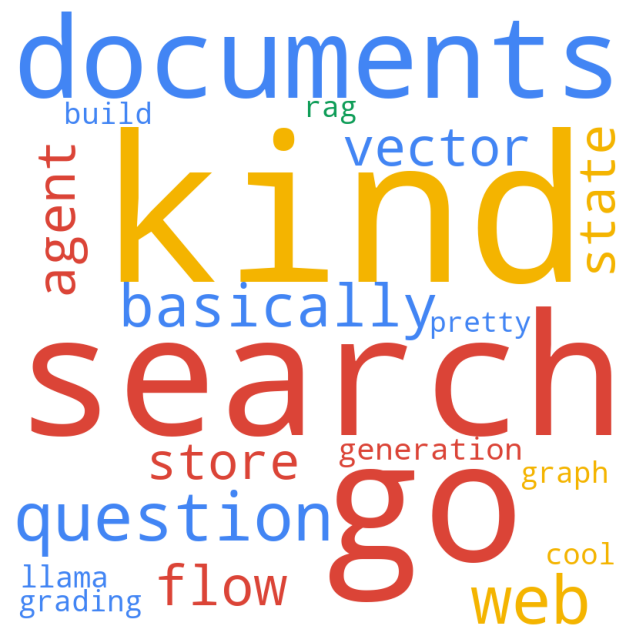

In [ ]:
# Remove STOP WORDS like "at", "the" and "and" - then create a word cloud by frequency of key terms in the transcript
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import plotly.express as px
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Download dics of words
nltk.download('stopwords')
nltk.download('punkt')

# Tokenize
words = word_tokenize(transcript_text)

# Filter out stop words and junk/filler words
stop_words = set(stopwords.words('english'))
more_stop_words = ['use', 'well', 'azure', 'new', 'one', 'know', 'see', 'got', 'make', 'actually', 'let', 'sort', 'yeah', 'able', 'need', 'going', 'show', 'take', \
                   'microsoft', 'thomas', 'aws', 'help', 'gon', 'na', 'back', 'us', 'uh', 'um', 'way', 'right', 'much', 'really', 'want', 'get', 'google', 'amazon', 'also', 'like' \
                   'thank', 'like', 'thank', 'great', 'including', 'using', 'applause', 'today', 'across', 'find']
all_stop_words = stop_words.union(more_stop_words)
keywords = [word.lower() for word in words if word.isalpha() and word.lower() not in all_stop_words]

# Calculate freq. dist. of the words remaining 'keywords'
freq_dist = nltk.FreqDist(keywords)

# Get the top N most common, after remove basic words, replace (N) w/ the TopN you want.
common_words = freq_dist.most_common(20)

# Create a string
word_freq = {word: freq for word, freq in common_words}

# WordCloud (WC)
wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      min_font_size = 10)

# # Generage the WC
# wordcloud.generate_from_frequencies(word_freq)

# # Plot and show the WC           
# plt.figure(figsize = (8, 8), facecolor = None) 
# plt.imshow(wordcloud)
# plt.tight_layout(pad = 0)
# plt.axis("off") 
# plt.show()

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from random import choice

# Define Google's primary colors
google_colors = ['#DB4437', '#4285F4', '#F4B400', '#0F9D58']  # Blue, Green, Yellow, Red

def google_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return choice(google_colors)

# Assuming 'word_freq' is your dictionary of word frequencies
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10,
                      color_func=google_color_func)  # Use the custom color function

# Generate and display the word cloud
wordcloud.generate_from_frequencies(word_freq)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()



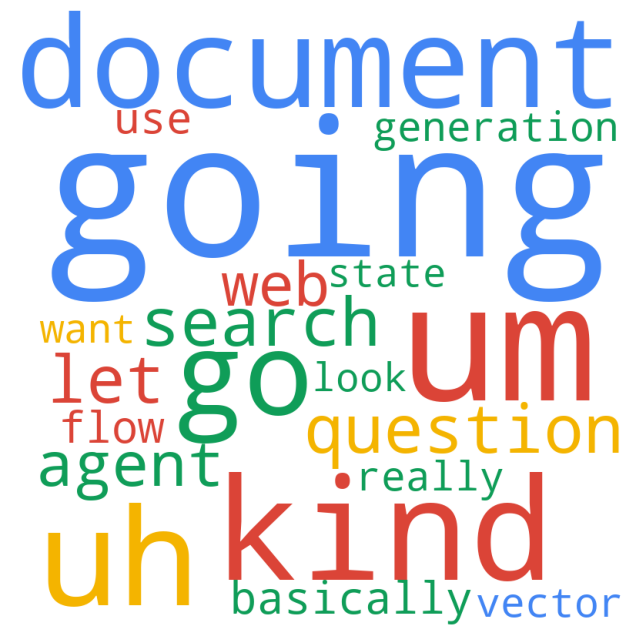

In [ ]:
import re
import numpy as np
from youtube_transcript_api import YouTubeTranscriptApi
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from random import choice

# Replace 'video_id' with the ID of the YouTube video for your favorite tech Keynote address
video_id = '-ROS6gfYIts&t'

# Download the YouTube video transcript
transcript_list = YouTubeTranscriptApi.get_transcript(video_id)
transcript_text = ' '.join([transcript['text'] for transcript in transcript_list])

# Correct common transcription errors with technical jargon
corrections = {
    r'\bsequel\b': 'SQL',  # Example correction; add others as needed
    # Add more replacements here as needed
}
for pattern, replacement in corrections.items():
    transcript_text = re.sub(pattern, replacement, transcript_text, flags=re.IGNORECASE)

# Save the transcript to a file
with open(video_id + '_output.txt', 'w', encoding='utf-8') as file:
    file.write(transcript_text)

# Initialize the NLTK lemmatizer
lemmatizer = WordNetLemmatizer()

# Tokenize and lemmatize the text
tokens = word_tokenize(transcript_text.lower())  # Tokenize and convert to lower case
lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha()]

# Create a cleaned text from the lemmatized tokens
cleaned_text = ' '.join(lemmatized_tokens)

# TF-IDF Vectorization excluding custom stop words and lemmatization
custom_stop_words = list(set(stopwords.words('english')) | {'new', 'one', 'know', 'see', 'got', 'make', 'actually', 'like'})
tfidf_vectorizer = TfidfVectorizer(stop_words=custom_stop_words)
tfidf_matrix = tfidf_vectorizer.fit_transform([cleaned_text])

# Get feature names and corresponding scores
feature_names = tfidf_vectorizer.get_feature_names_out()
word_scores = tfidf_matrix.sum(axis=0).A1
word_freq = dict(zip(feature_names, word_scores))

# Define Google's primary colors
google_colors = ['#DB4437', '#4285F4', '#F4B400', '#0F9D58']  # Red, Blue, Yellow, Green

def google_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return choice(google_colors)

# Number of words you want to display in the word cloud
top_n = 20
word_freq_top_n = dict(sorted(word_freq.items(), key=lambda item: item[1], reverse=True)[:top_n])

# Create and display the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10,
                      color_func=google_color_func).generate_from_frequencies(word_freq_top_n)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
